# Insight: According to the Australian Bureau of Statistics (ABS), more than 30% of young people (15-19 years) were employed in 2016. 


## Open source code for extracting a  data insight 

This Jupyter notebook demonstrates how to download and analyse the underlying data and extract information about youth engagement in work and study.

<img src="https://images.unsplash.com/photo-1522202176988-66273c2fd55f?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1351&q=80" width ="1200" height=600 >
<span style="font-style:italic;">Photo by <a href="https://unsplash.com/@brookecagle?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Brooke Cagle</a> on <a href="https://unsplash.com">Unsplash</a></span>

## The insight generation process is divided into sub-tasks as shown below:
 1. Download data
 2. Explore data
 3. Extract/analyse data
 4. Visualize data
 
 ## Step 1 : Download data

First, we download "14100do0005_2014-19.xlsx" from Github (https://github.com/soda-lab/data-registry/) which is a copy of "*Education and Employment, ASGS and LGA, 2011, 2014-2019, 1410.0 - Data by Region, 2014-19*" data from the Australian Bureau of Statistics (**ABS**) [1]. 

- **Australian Beureau of Statistics (ABS)**: ABS is a national statistical agency in Australia. It provides a huge range of statistical data on economic, population, environmental, and social issues. The ABS also operates the national Census of Population and Housing that occurs every five years.

- **1410.0 - Data by Region, 2014-19:** Data provides region and local area data on population, economy, income, education and health that is collected from administrative datasets, the Census of Population and Housing, and various ABS surveys.

### Download data by using python code

Below python code demonstrate how to download data from the git repository.

In [1]:
import pandas as pd

repository = 'https://github.com/soda-lab/data-registry/'
path = 'blob/main/original_data/'
dataset = '14100do0005_2014-19.xlsx'
raw = '?raw=ture'

url = repository + path + dataset + raw
xls = pd.ExcelFile(url)

In [2]:
# print sheet name
print(xls.sheet_names)

['Contents', 'Table 1', 'Table 2']


Data successfully loaded to the Jupyter notebook. The data includes "Contents", "Table 1", and "Table 2" (see above cell output)

## Step 2: Explore data

Before we start to extract insights from the dataset, we need to explore the dataset to identify potential insights that can be driven from the dataset. As you can see in the below screenshot, the "Contents" sheet contains brief information about the dataset.  

**Data by Region, 2014-2019** contains two tables: 
- Table 1 contains "EDUCATION AND EMPLOYMENT" data by Australia, State and Territory, Statistical Area Levels 2-4, Greater Capital City Statistical Areas between 2014 and 2019
- Table 2 contains "EDUCATION AND EMPLOYMENT" data by Local Government Area (LGA) level between 2014 and 2019. 

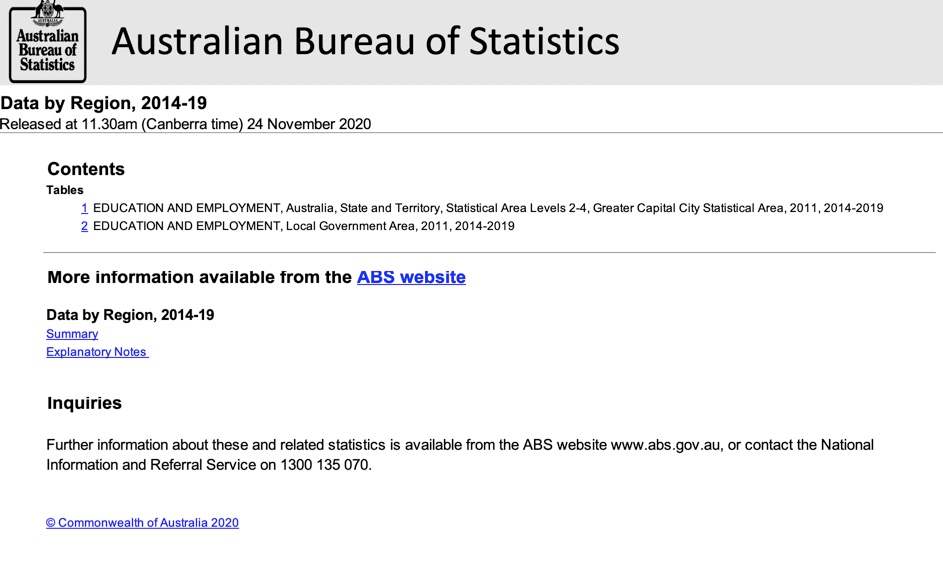

### Table 1 exploration

In [18]:
df1 = pd.read_excel(xls, sheet_name = 'Table 1', skiprows=6, header=0, index_col=0)
df1 = df1.dropna(subset=['Year'], how='all') # drop rows where it contains meaningless values
df1

,Label,Year,4 year olds enrolled in preschool or in a preschool program (no.),5 year olds enrolled in preschool or in a preschool program (no.),Total enrolled in preschool (no.),Enrolled in preschool program within a long day care centre (no.),Children enrolled across more than one provider type (no.),Total enrolled in a preschool program (no.),Children attending preschool for less than 15 hours (no.),Children attending preschool for 15 hours or more (no.),...,Total population aged 15 years and over (no.),Managers (%),Professionals (%),Technicians and trades workers (%),Community and personal service workers (%),Clerical and administrative workers (%),Sales workers (%),Machinery operators and drivers (%),Labourers (%),Occupation of Employed Persons - Inadequately described (%)
Code,,,,,,,,,,,,,,,,,,,,,
0,Australia,2011.0,-,-,-,-,-,-,-,-,...,17363696,12.9,21.3,14.2,9.7,14.7,9.4,6.6,9.4,1.9
0,Australia,2014.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
0,Australia,2015.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
0,Australia,2016.0,268458,62215,144580,161029,25065,330676,71164,246861,...,19037277,13,22.2,13.5,10.8,13.6,9.4,6.3,9.5,1.7
0,Australia,2017.0,274114,65131,144602,168049,26590,339243,69657,255467,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901041004,Norfolk Island,2015.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
901041004,Norfolk Island,2016.0,-,-,-,-,-,-,-,-,...,1450,17.2,10.8,19,12,11.8,10.9,4,12.5,2.2
901041004,Norfolk Island,2017.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


As you can see in the above data table, there are 19,229 rows and 88 columns. The **Code** column contains digits indicating statistical areas used by the Australian Statistical Geography Standard (ASGS), and **Label** column contains the name of the statistical areas while other columns contain numeric values. We print all names of 88 columns in the below cell.

In [14]:
list(df1.columns)

['Label',
 'Year',
 '4 year olds enrolled in preschool or in a preschool program (no.)',
 '5 year olds enrolled in preschool or in a preschool program (no.)',
 'Total enrolled in preschool (no.)',
 'Enrolled in preschool program within a long day care centre (no.)',
 'Children enrolled across more than one provider type (no.)',
 'Total enrolled in a preschool program (no.)',
 'Children attending preschool for less than 15 hours (no.)',
 'Children attending preschool for 15 hours or more (no.)',
 'Taxpayers with Higher Education Loan Program (HELP) repayment (no.)',
 'Number of Jobs - Females',
 'Number of Jobs - Males',
 'Number of Jobs - Persons',
 'Number of Employee Jobs - Agriculture, forestry and fishing',
 'Number of Employee Jobs - Mining',
 'Number of Employee Jobs - Manufacturing',
 'Number of Employee Jobs - Electricity, gas water and waste services',
 'Number of Employee Jobs - Construction',
 'Number of Employee Jobs - Wholesale trade',
 'Number of Employee Jobs - Retail tr

### Table 2 exploration

In [6]:
df2 = pd.read_excel(xls, sheet_name = 'Table 2', skiprows=6, header=0, index_col=0)
df2 = df2.dropna(subset=['Year'], how='all') # drop rows where it contains meaningless values
df2

,Label,Year,4 year olds enrolled in preschool or in a preschool program (no.),5 year olds enrolled in preschool or in a preschool program (no.),Total enrolled in preschool (no.),Enrolled in preschool program within a long day care centre (no.),Children enrolled across more than one provider type (no.),Total enrolled in a preschool program (no.),Children attending preschool for less than 15 hours (no.),Children attending preschool for 15 hours or more (no.),...,Total population aged 15 years and over (no.),Managers (%),Professionals (%),Technicians and trades workers (%),Community and personal service workers (%),Clerical and administrative workers (%),Sales workers (%),Machinery operators and drivers (%),Labourers (%),Occupation of Employed Persons - Inadequately described (%)
Code,,,,,,,,,,,,,,,,,,,,,
10050,Albury (C),2011.0,-,-,-,-,-,-,-,-,...,38510,11,18.9,15.2,10.7,13.9,10.8,7.3,10.6,1.6
10050,Albury (C),2014.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
10050,Albury (C),2015.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
10050,Albury (C),2016.0,580,224,392,289,123,814,330,457,...,41468,10.9,19.7,14.7,12.3,13.1,10.9,6.7,10.2,1.5
10050,Albury (C),2017.0,613,268,436,322,126,892,236,635,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99399,Unincorp. Other Territories,2015.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
99399,Unincorp. Other Territories,2016.0,45,-,43,-,-,47,9,33,...,3714,15.8,11,17.6,13.9,11.6,6,7.4,13.7,2.4
99399,Unincorp. Other Territories,2017.0,45,5,34,-,7,50,3,35,...,-,-,-,-,-,-,-,-,-,-


Table 2 contains exactly the same columns as Table 1. However, the number of rows is much smaller than in Table 1 as Table 2 contains Education and employment data by Local Government Area (LGA) level instead of other statistical area levels. 

## Step3: Extract/analyse data

After observing two tables, we determined to analyse the youth engagement to work in state and territory level. In order to do that, we need to extract columns and rows from the "Table 1". Below python code demonstrate how to extract columns and rows from the data table.

In [38]:
defined_columns = [
    'Label', 
    'Year',
    'Working full-time and studying part-time (%)',
    'Working part time and studying part-time (%)',
    'Working part-time and studying full-time (%)',
    'Working full-time (not studying) (%)',
    'Working full-time and studying full-time (%)',
    'Working (away from work) and studying full-time (%)',
    ]

defined_rows = [
    'New South Wales', 
    'Victoria',
    'Queensland',
    'South Australia',
    'Western Australia',
    'Tasmania',
    'Northern Territory',
    'Australian Capital Territory',
    'Australia'
]

defined_year = 2016

extracted_df = pd.DataFrame(columns=['Label'])
for index, row in df1.iterrows():
    if row['Label'] in defined_rows and row['Year'] == defined_year: # extract data by rows and year
        extracted_df = extracted_df.append(row)    

extracted_df.Year = extracted_df.Year.astype(int) # convert data type to int
extracted_df = extracted_df.drop_duplicates(subset=['Label', 'Year'])# remove duplications
extracted_df = extracted_df[defined_columns] # extract data by columns

# create and add "Total working engagement(%)" column to the extracted table
extracted_df['Total working engagement(%)'] =  extracted_df[['Working full-time and studying part-time (%)',
                                                            'Working part time and studying part-time (%)',
                                                            'Working part-time and studying full-time (%)',
                                                            'Working full-time (not studying) (%)',
                                                            'Working full-time and studying full-time (%)',
                                                            'Working (away from work) and studying full-time (%)']].sum(axis=1)
extracted_df  

    

,Label,Year,Working full-time and studying part-time (%),Working part time and studying part-time (%),Working part-time and studying full-time (%),Working full-time (not studying) (%),Working full-time and studying full-time (%),Working (away from work) and studying full-time (%),Total working engagement(%)
0,Australia,2016,1.7,1.4,21.2,5.3,0.4,1.6,31.6
1,New South Wales,2016,2.3,1.4,19.9,5.1,0.4,1.8,30.9
2,Victoria,2016,1.4,1.1,22.1,3.8,0.3,1.7,30.4
3,Queensland,2016,1.2,1.5,22.2,7.3,0.5,1.5,34.2
4,South Australia,2016,1.1,1.5,21.5,4.5,0.3,1.5,30.4
5,Western Australia,2016,1.7,1.5,21.2,5.9,0.4,1.4,32.1
6,Tasmania,2016,1.7,1.2,20.1,6.0,0.3,1.8,31.1
7,Northern Territory,2016,1.7,1.2,13.2,8.4,0.5,1.2,26.2
8,Australian Capital Territory,2016,1.9,1.3,26.6,4.5,1.8,2.4,38.5


Reflecting the economic reality of young adulthood in Australia while 5.3 percent of young people reported working full-time (not studying), 21.2 percent reported combining part-time work with full-time study and a further 1.4 percent reported working part-time while also studying part-time. 

Across the states and territories, the ACT had the highest percentage of working engagement in young people (38.5%) followed by Queensland (34.2%) while the Northern Territory had the lowest percentage (26.2 %). 

## Step4: Visualize data

Although the extracted data was presented in the table above, we would like to visualize the data with **Matplot** python library. We firstly draw a clustered bar chart excluding 'Australia'(national) row to compare values across states and territories. Then, we draw a bar chart with the 'Australia'(national) row.

- **Matplot** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

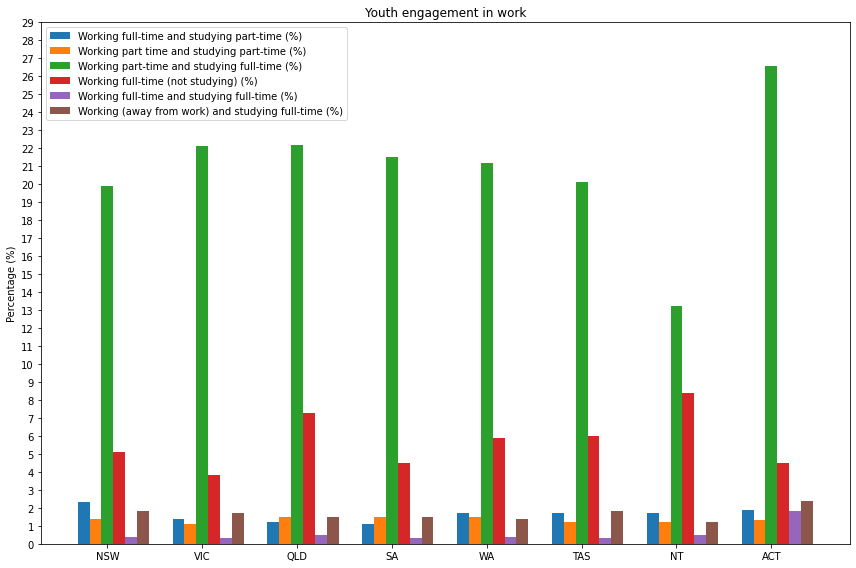

In [90]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

wfsp = tuple(extracted_df.iloc[1:, 2])
wpsp = tuple(extracted_df.iloc[1:, 3])
wpsf = tuple(extracted_df.iloc[1:, 4])
wf = tuple(extracted_df.iloc[1:, 5])
wfsf = tuple(extracted_df.iloc[1:, 6])
wasf = tuple(extracted_df.iloc[1:, 7])

ind = np.arange(len(extracted_df.iloc[1:, 2]))    # the x locations for the groups
width = 0.25       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, wfsp, width/2,
                label='Year 10')
rects2 = ax.bar(ind - width/2, wpsp, width/2,
                label='Year 11')
rects3 = ax.bar(ind , wpsf, width/2,
                label='Year 12')
rects4 = ax.bar(ind + width/2, wf, width/2,
                label='Year 8')
rects5 = ax.bar(ind + width, wfsf, width/2,
                label='Year 9')
rects6 = ax.bar(ind + width*1.5, wasf, width/2,
                label='No school')

plt.ylabel('Percentage (%)')
plt.title('Youth engagement in work')
plt.xticks(ind, ('NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT'))
plt.yticks(np.arange(0, 30))
plt.legend((rects1, rects2, rects3, rects4, rects5, rects6), ('Working full-time and studying part-time (%)',
                            'Working part time and studying part-time (%)',
                            'Working part-time and studying full-time (%)',
                            'Working full-time (not studying) (%)',
                            'Working full-time and studying full-time (%)',
                            'Working (away from work) and studying full-time (%)'
                                ))

fig.set_size_inches(12, 8)
fig.tight_layout()

plt.show()

As same as what we observed in the extracted data table, **Working part-time and studying full-time (%)** (green bar)is the  greatest value across all states and territories followed by **'Working full-time (not studying) (%)** (red bar). Overall, the ACT had the highest percentage of working engagement in young people (38.5%) followed by Queensland (34.2%) while the Northern Territory had the lowest percentage (26.2 %).

## Conclusion

In this Jupyter notebook, we demonstrated how to download a data collection from Github and explore the data collection by using python code. Data "*1410.0 - Data by Region, 2014-19, Education and Employmnet, ASGS and LGA, 2011, 2014-2019*" contains information about education and employment in Australia between 2014 and 2019. Python code were used to extract a data table from the collection and visualize the table by two figures. Eventually, we learned the data insight "**According to the Australian Bureau of Statistics (ABS), more than 30% of young people (15-19 years) were employed in 2016**" from this activity.

## References

[1] Australian Bureau of Statistics, 1410.0 - Data by Region, 2014-19, Education and Employment, ASGS and LGA, 2011, 2014-2019, Australian Bureau of Statistics, 2020. [Dataset] Available:https://www.abs.gov.au/AUSSTATS/abs@.nsf/DetailsPage/1410.02014-19?OpenDocument.  [Accessed: January 4, 2021].